In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the data
df = pd.read_csv('../input/suv-data/suv_data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


We will divide the data into dependent and independent variables.

In [3]:
X = df.iloc[:,[2,3]]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
Y = df.iloc[:,4]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


We can see that our data 'Age' and 'EstimatedSalary' are of different ranges, so we will scale the data so that the model performs better,The mean should be near to 0 and standard deviation should be near 1 before training the model which is ensured by this.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

Now that our data has been transformed , we need to divide the data into training and testing data

In [9]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=99)

In [10]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((280, 2), (120, 2), (280,), (120,))

Now that our data has been divided we will perform Logistic Regression on it.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
lr.fit(train_x,train_y)

LogisticRegression()

In [14]:
y_pred = lr.predict(test_x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
test_y

61     0
348    0
163    0
7      1
275    1
      ..
259    1
241    0
106    0
200    0
285    1
Name: Purchased, Length: 120, dtype: int64

In [16]:
results = pd.DataFrame({'Actual' : test_y, 'Predicted' : y_pred})
results

,Actual,Predicted
61,0,0
348,0,0
163,0,0
7,1,1
275,1,1
...,...,...
259,1,1
241,0,0
106,0,0
200,0,0


In [17]:
lr.score(test_x,test_y)

0.8666666666666667

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix

In [19]:
accuracy_score(test_y, y_pred)

0.8666666666666667

In [20]:
cm = confusion_matrix(test_y,y_pred)
cm

array([[78,  5],
       [11, 26]])

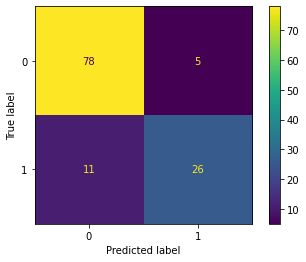

In [21]:
plot_confusion_matrix(lr, test_x, test_y)
